In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
data_error = pd.read_csv('/content/drive/MyDrive/Capstone_Project_Dataset/PdM_errors.csv')
data_failure = pd.read_csv('/content/drive/MyDrive/Capstone_Project_Dataset/PdM_failures.csv')
data_machine = pd.read_csv('/content/drive/MyDrive/Capstone_Project_Dataset/PdM_machines.csv')
data_maint = pd.read_csv('/content/drive/MyDrive/Capstone_Project_Dataset/PdM_maint.csv')
data_tele = pd.read_csv('/content/drive/MyDrive/Capstone_Project_Dataset/PdM_telemetry.csv')

# ***Error Data***

In [ ]:
data_error

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
data_error.describe()

,machineID
count,3919.000000
mean,51.044654
std,28.954988
min,1.000000
25%,25.000000
50%,51.000000
75%,77.000000
max,100.000000


In [ ]:
#checking the null values
data_error.isnull().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [ ]:

failure_connection = data_error.groupby(['machineID', 'errorID']).size().reset_index(name='count')
print(failure_connection)

     machineID errorID  count
0            1  error1     11
1            1  error2      6
2            1  error3      9
3            1  error4      5
4            1  error5      4
..         ...     ...    ...
488        100  error1     11
489        100  error2      7
490        100  error3      8
491        100  error4      4
492        100  error5      1

[493 rows x 3 columns]


In [ ]:

data_error['datetime'] = pd.to_datetime(data_error['datetime'],format = '%Y-%m-%d %H:%M:%S')
data_error['errorID'] = data_error['errorID'].astype('category')
print("Total Number of error records: %d" %len(data_error.index))
data_error

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


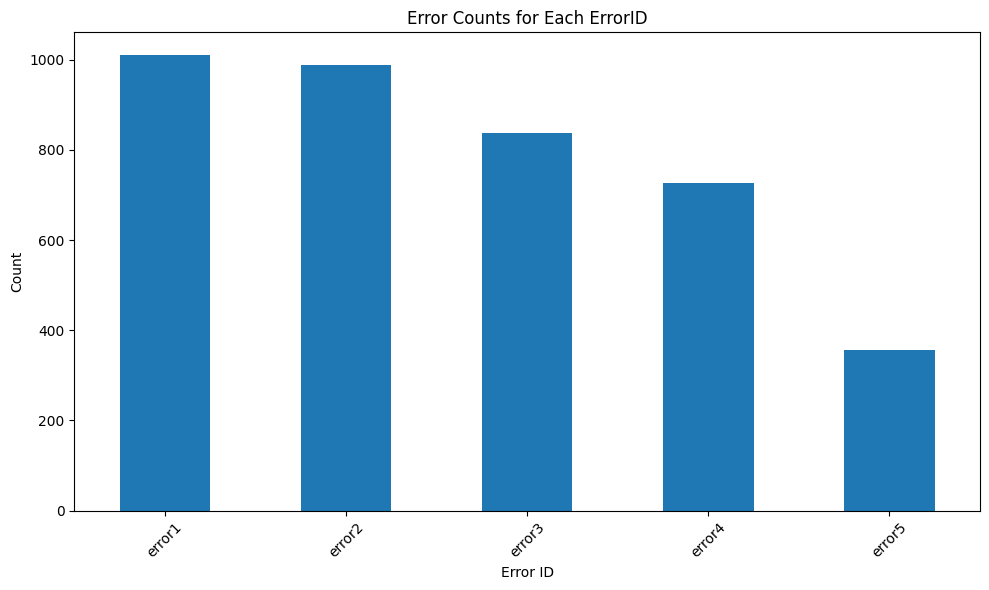

In [ ]:
#finding the unique value counts of column errorID
errorid_counts = data_error['errorID'].value_counts()
errorid_counts
#ploting barchart
plt.figure(figsize=(10, 6))
errorid_counts.plot(kind='bar')
plt.xlabel('Error ID')
plt.ylabel('Count')
plt.title('Error Counts for Each ErrorID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Failure Data***

In [ ]:
data_failure

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


In [ ]:
data_failure.describe()

,machineID
count,761.000000
mean,51.911958
std,29.515542
min,1.000000
25%,24.000000
50%,51.000000
75%,79.000000
max,100.000000


In [ ]:
data_failure.isnull().sum()


datetime     0
machineID    0
failure      0
dtype: int64

In [ ]:
failure_connection = data_failure.groupby(['machineID', 'failure']).size().reset_index(name='count')
print(failure_connection)

     machineID failure  count
0            1   comp1      1
1            1   comp2      2
2            1   comp4      4
3            2   comp1      1
4            2   comp2      3
..         ...     ...    ...
255         99   comp2      6
256         99   comp3      6
257         99   comp4      5
258        100   comp1      2
259        100   comp2      1

[260 rows x 3 columns]


In [ ]:
#finding the unique value counts of column errorID
failure_counts = data_failure['failure'].value_counts()
failure_counts

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

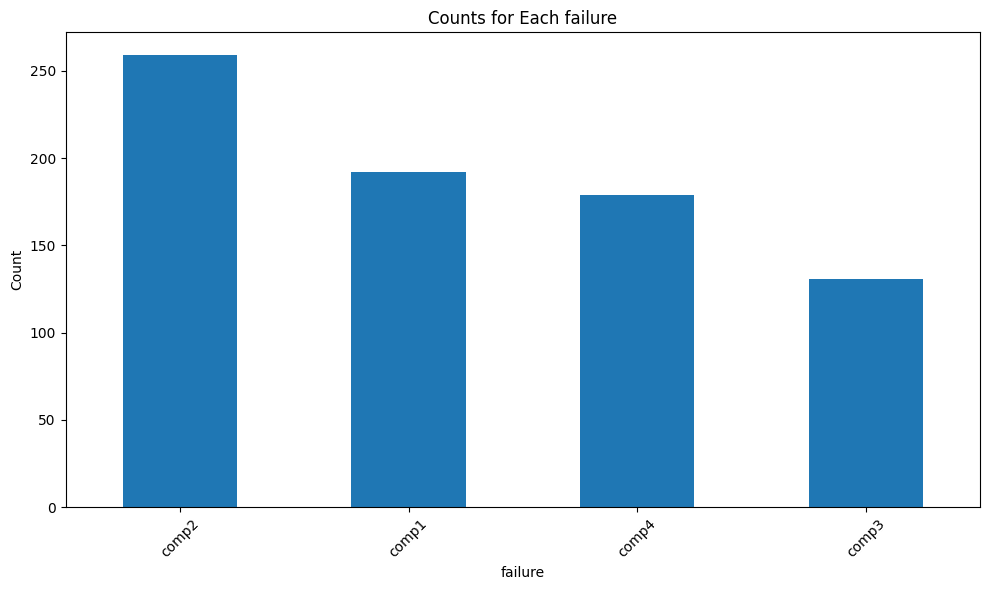

In [ ]:
#ploting barchart
plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar')
plt.xlabel('failure')
plt.ylabel('Count')
plt.title('Counts for Each failure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Machine Data***

In [ ]:
data_machine

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


In [ ]:
data_machine.describe()

,machineID,age
count,100.000000,100.000000
mean,50.500000,11.330000
std,29.011492,5.856974
min,1.000000,0.000000
25%,25.750000,6.750000
50%,50.500000,12.000000
75%,75.250000,16.000000
max,100.000000,20.000000


In [ ]:
data_machine.isnull().sum()

machineID    0
model        0
age          0
dtype: int64

In [ ]:
failure_connection = data_machine.groupby(['machineID', 'model']).size().reset_index(name='count')
print(failure_connection)

    machineID   model  count
0           1  model3      1
1           2  model4      1
2           3  model3      1
3           4  model3      1
4           5  model3      1
..        ...     ...    ...
95         96  model2      1
96         97  model2      1
97         98  model2      1
98         99  model1      1
99        100  model4      1

[100 rows x 3 columns]


In [ ]:
failure_counts = data_machine['model'].value_counts()
failure_counts

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

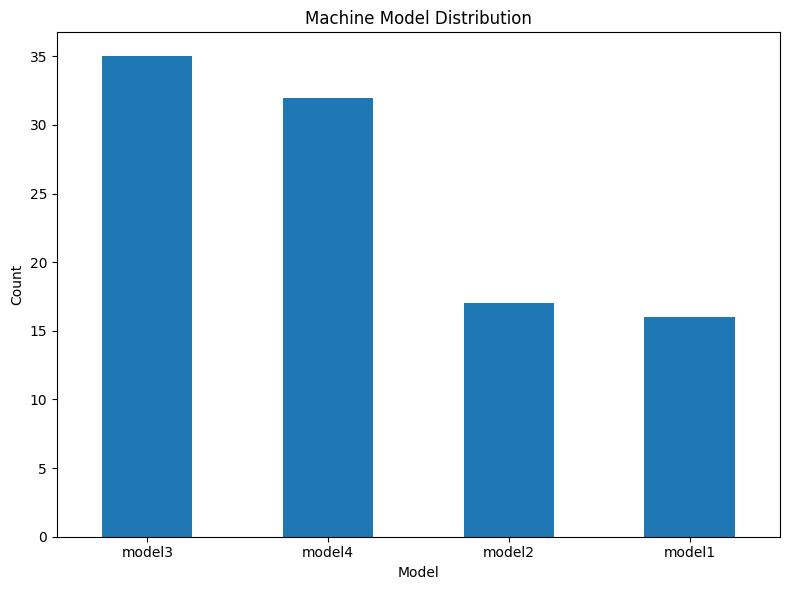

In [ ]:
model_counts = data_machine['model'].value_counts()
# Plot the bar chart
plt.figure(figsize=(8, 6))
model_counts.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Machine Model Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

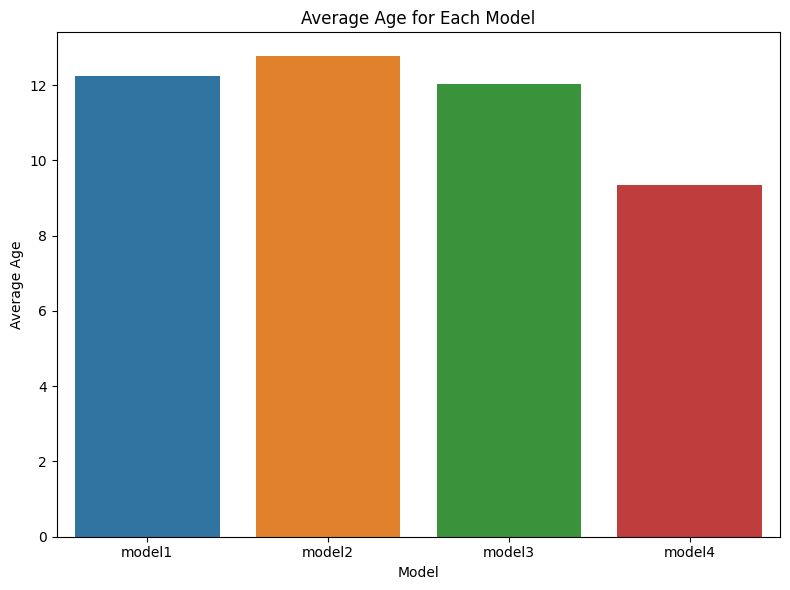

In [ ]:
avg_age_by_model = data_machine.groupby('model')['age'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_age_by_model, x='model', y='age')
plt.xlabel('Model')
plt.ylabel('Average Age')
plt.title('Average Age for Each Model')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

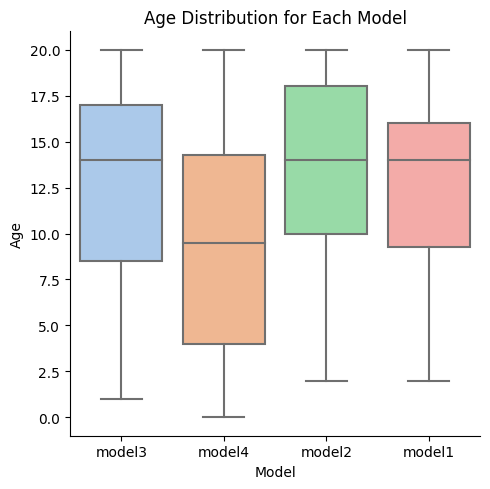

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(data=data_machine, x='model', y='age', kind='box', palette='pastel')
plt.xlabel('Model')
plt.ylabel('Age')
plt.title('Age Distribution for Each Model')
plt.tight_layout()
plt.show()

"error" represents minor issues or mistakes that don't cause a system to crash, while "failure" denotes more significant problems that lead to a complete breakdown or disruption. Chronologically plotted, errors appear as small blips, while failures are evident as major disruptions in the timeline. Understanding this relationship helps improve system reliability and performance.

<ipython-input-24-752c6ce718c3>:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])


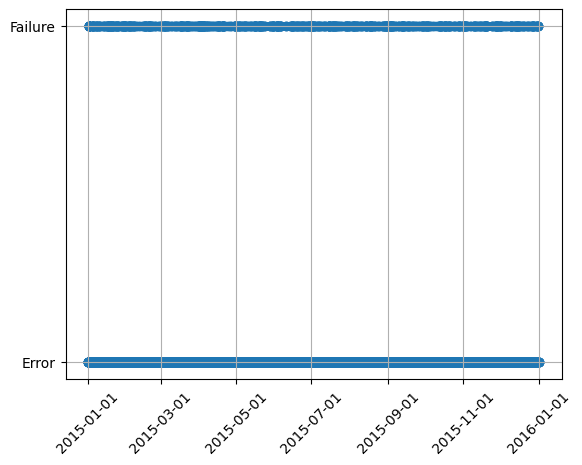

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

# For a simpler plot, we will use two different values in the y-axis to differentiate between error and failure
y_category = list()

for iter in range(0, len(data_failure)):
  y_category.append('Failure')

for iter in range(0, len(data_error)):
  y_category.append('Error')

# Get timestamp from error and selected failure
df_timestamp = pd.concat([data_failure['datetime'], data_error['datetime']], ignore_index=True, axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp, "category": y_category})
df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])
df_plot.sort_values(by=['timestamp'], inplace=True, ignore_index=True)


# Plot the data with timestamp as x-axis
ax.scatter('timestamp', 'category', data = df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x', rotation=45)
ax.grid()

From the plot, it becomes clear that failures are typically foreshadowed by prior errors in the machine. Nevertheless, not all errors immediately result in failures; there is often a time gap before the machine eventually breaks down. As a result, the subsequent analysis centers on the failure data to pinpoint which features are impacted by the machine's breakdown. This examination aims to uncover patterns or signals that could be utilized for predicting or avoiding future failures.

# ***Maintenance Data***

In [ ]:
data_maint

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
...,...,...,...
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2


In [ ]:
data_maint.describe()

,machineID
count,3286.000000
mean,50.284236
std,28.914478
min,1.000000
25%,25.250000
50%,50.000000
75%,75.000000
max,100.000000


In [ ]:
data_maint.isnull().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [ ]:
failure_connection = data_maint.groupby(['machineID', 'comp']).size().reset_index(name='count')
print(failure_connection)

     machineID   comp  count
0            1  comp1     11
1            1  comp2      9
2            1  comp3      8
3            1  comp4      9
4            2  comp1      7
..         ...    ...    ...
395         99  comp4      7
396        100  comp1     10
397        100  comp2      4
398        100  comp3      7
399        100  comp4      7

[400 rows x 3 columns]


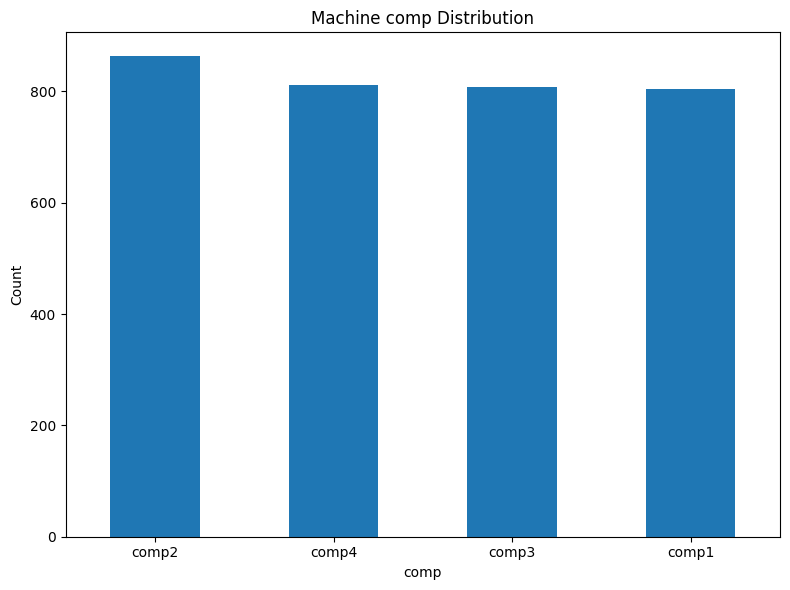

In [ ]:
model_counts = data_maint['comp'].value_counts()
# Plot the bar chart
plt.figure(figsize=(8, 6))
model_counts.plot(kind='bar')
plt.xlabel('comp')
plt.ylabel('Count')
plt.title('Machine comp Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ***Telemetry Data***

In [ ]:
data_tele

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [ ]:
data_tele.isnull().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

<ipython-input-32-e4be497f85dc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data_tele.groupby('machineID').mean()


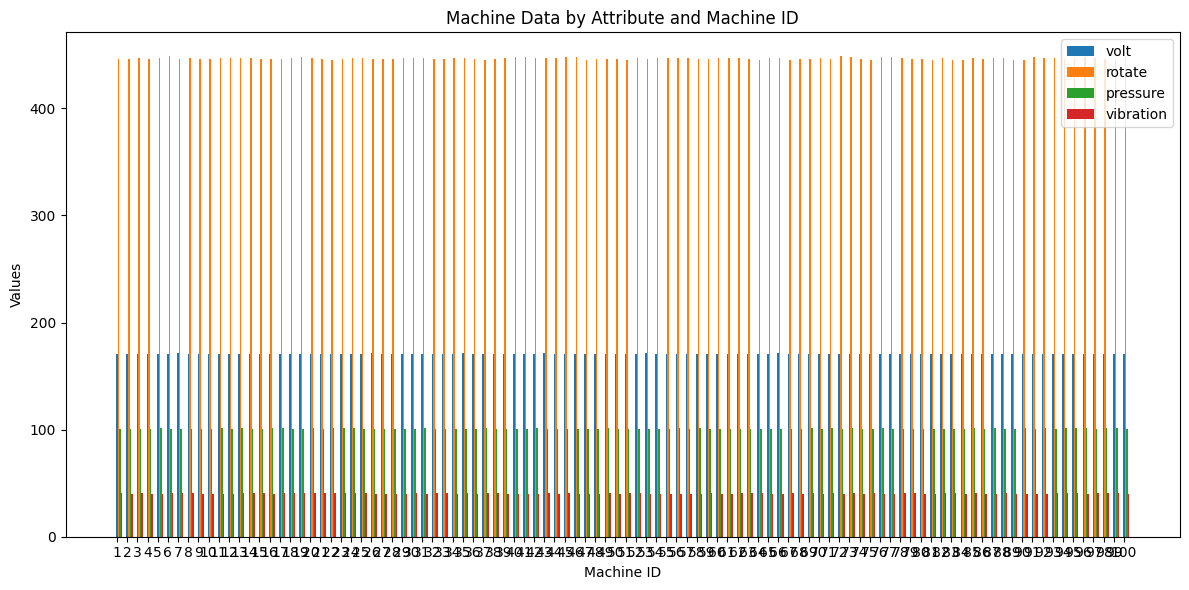

In [ ]:
# Group by machineID and calculate the mean for each attribute
grouped_data = data_tele.groupby('machineID').mean()

# Extract the attribute values for plotting
attributes = ['volt', 'rotate', 'pressure', 'vibration']
attribute_values = grouped_data[attributes]

# Get the machine IDs as x-axis labels
machine_ids = grouped_data.index

# Plot the grouped bar diagram
plt.figure(figsize=(12, 6))
bar_width = 0.15

# Convert range object to a list
x_indexes = list(range(len(machine_ids)))

for i, attribute in enumerate(attributes):
    plt.bar(
        [x + i * bar_width for x in x_indexes],
        attribute_values[attribute],
        bar_width,
        label=attribute
    )

plt.xlabel('Machine ID')
plt.ylabel('Values')
plt.title('Machine Data by Attribute and Machine ID')
plt.xticks(range(len(machine_ids)), machine_ids)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# format datetime field which comes in as string
data_tele['datetime'] = pd.to_datetime(data_tele['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(data_tele.index))
print(data_tele.head())

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


In [ ]:
data_tele.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


# ***Feature check***
Here, we will select the time window from the failure record, then plot each feature and check their response in the event of failures.

<ipython-input-35-010209d4688a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sel.loc[:, 'datetime'] = pd.to_datetime(df_sel.loc[:, 'datetime'])


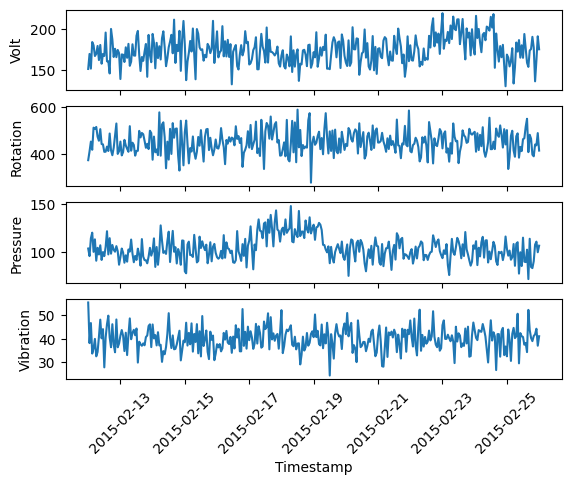

In [ ]:
# Change datatype of the timestamp column from object to datetime
df_sel = data_tele.loc[data_tele['machineID'] == 11].reset_index(drop=True)
df_sel.loc[:, 'datetime'] = pd.to_datetime(df_sel.loc[:, 'datetime'])

# Select the date to check from failure records
st = df_sel.loc[df_sel['datetime'] == "2015-02-19"].index.values[0]

# Then, filter the telemetry data by the date and allow 7 days before and after
# the error occurs to observe any abnormalities.
select = df_sel.loc[st-7*24:st + 7*24,:]

# Plot volt and rotation feature
fig, ax = plt.subplots(nrows=4, sharex=True)
ax[0].plot('datetime', 'volt', data=select)
ax[0].set_ylabel("Volt")


ax[1].plot('datetime', 'rotate', data=select)
ax[1].set_ylabel("Rotation")

ax[2].plot('datetime', 'pressure', data=select)
ax[2].set_ylabel("Pressure")
# Plot pressure and vibration feature
ax[3].plot('datetime', 'vibration', data=select)
ax[3].set_ylabel("Vibration")
ax[3].set_xlabel("Timestamp")
ax[3].tick_params(axis='x', rotation=45)

As we observe volt and rotation readings, no noticeable anomalies are shown around the period of 2015-02-19. Then, next we will check both pressure and vibration features by plotting them.
Between pressure and vibration, abnormality around the period of 2015-02-19 is more noticeable. Thus, in the next step, we will use **pressure** as feature and predictor.

# ***Check autocorrelation and partial autocorrelation***
In time-series data, it is beneficial to check the autocorrelation and partial autocorrelation function of the data that will influence our model selection and parameter selection.

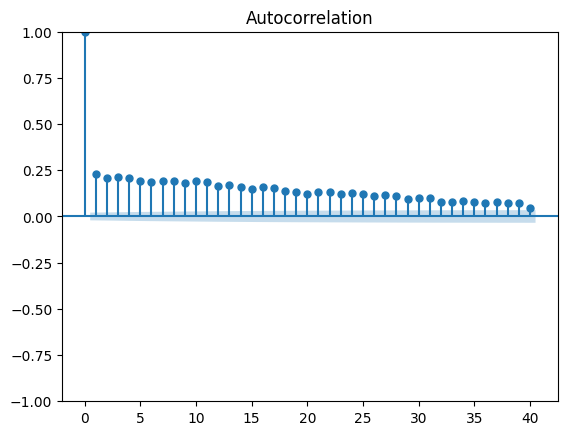

In [ ]:
# Import plotting function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(df_sel['pressure'], lags = 40)
plt.show()

From the autocorrelation plot, we can see that the data is positively correlated up to lags of 40, where the autocorrelation value itself is quite low, indicating that the data does not have a strong autocorrelation properties.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


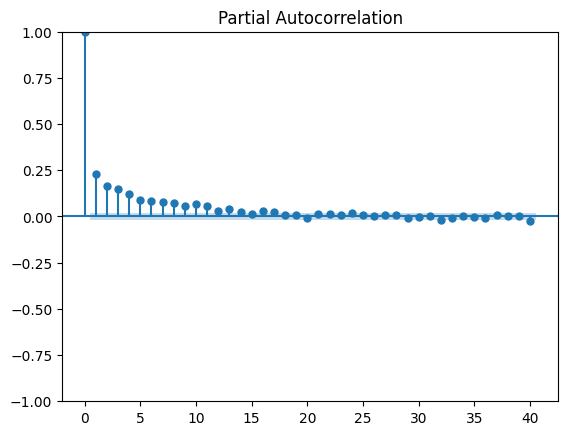

In [ ]:
# Partial autocorrelation plot
plot_pacf(df_sel['pressure'], lags = 40)
plt.show()

From the partial autocorrelation plot, the correlation between values of two different points in time is also quite weak, decaying to zero starting in the 15th lags. This information will be used in determining the lag in the model.

Text(0.5, 0, 'Date')

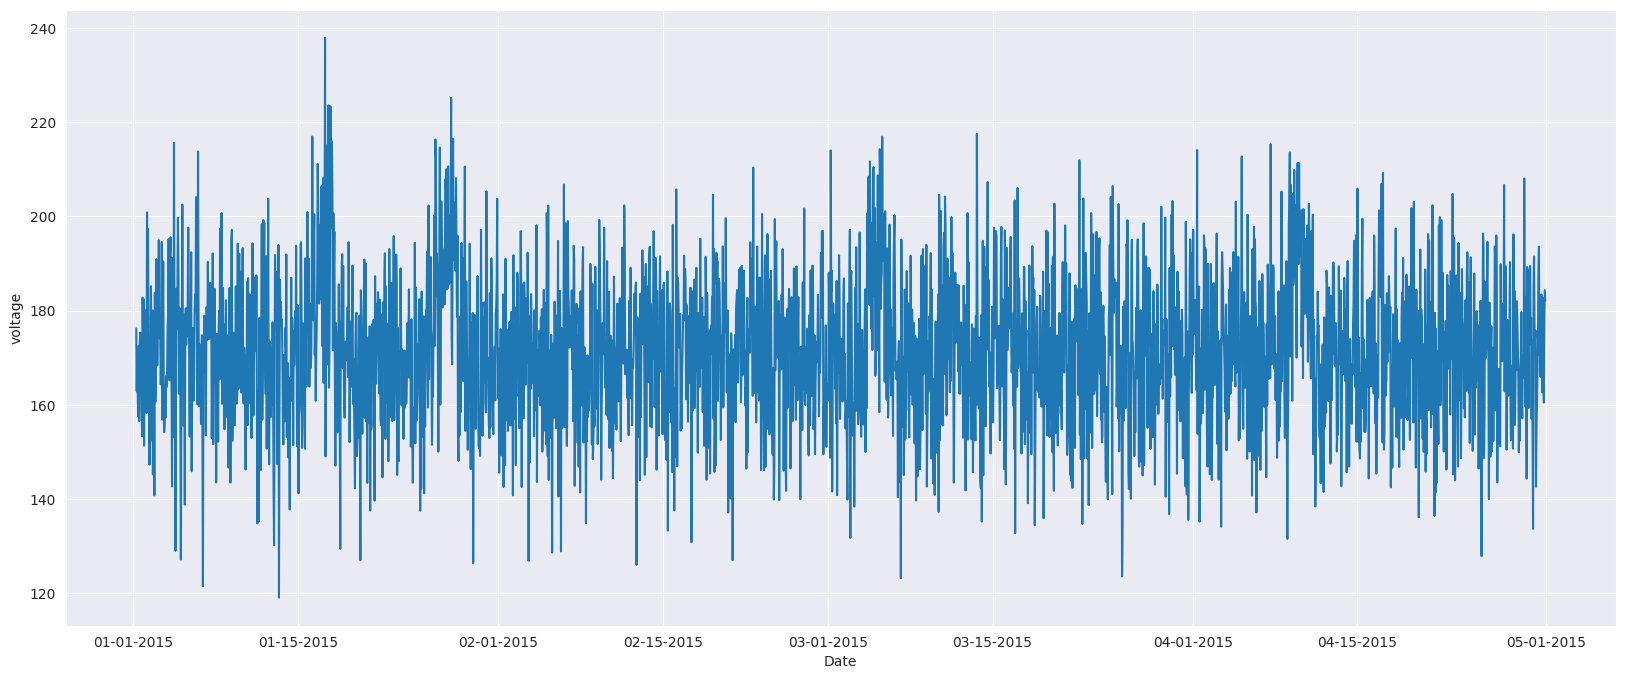

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = data_tele.loc[(data_tele['machineID'] == 1) &
                        (data_tele['datetime'] > pd.to_datetime('2015-01-01')) &
                        (data_tele['datetime'] <pd.to_datetime('2015-05-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

# ***Feature Engineering***
The first step in predictive maintenance applications is feature engineering which requires bringing the different data sources together to create features that best describe a machines's health condition at a given point in time. In the next sections, several feature engineering methods are used to create features based on the properties of each data source.

# ***Lag Features from Telemetry***
Telemetry data almost always comes with time-stamps which makes it suitable for calculating lagging features. A common method is to pick a window size for the lag features to be created and compute rolling aggregate measures such as mean, standard deviation, minimum, maximum, etc. to represent the short term history of the telemetry over the lag window. In the following, rolling mean and standard deviation of the telemetry data over the last 3 hour lag window is calculated for every 3 hours.

In [ ]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(data_tele, index='datetime', columns='machineID', values=col).resample('3H', closed='left', label='right').mean().unstack())

data_tele_mean_3h = pd.concat(temp, axis=1)
data_tele_mean_3h.columns = [i + 'mean_3h' for i in fields]
data_tele_mean_3h.reset_index(inplace=True)

# Repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(data_tele, index='datetime', columns='machineID', values=col).resample('3H', closed='left', label='right').std().unstack())

data_tele_sd_3h = pd.concat(temp, axis=1)
data_tele_sd_3h.columns = [i + 'sd_3h' for i in fields]
data_tele_sd_3h.reset_index(inplace=True)

data_tele_mean_3h

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542
...,...,...,...,...,...,...
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232
292098,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630


For capturing a longer term effect, 24 hour lag features are also calculated as below.

In [ ]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(data_tele, index='datetime', columns='machineID', values=col).resample('24H', closed='left', label='right').mean().unstack())

data_tele_mean_24h = pd.concat(temp, axis=1)
data_tele_mean_24h.columns = [i + 'mean_24h' for i in fields]
data_tele_mean_24h.reset_index(inplace=True)

# Repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(data_tele, index='datetime', columns='machineID', values=col).resample('24H', closed='left', label='right').std().unstack())

data_tele_sd_24h = pd.concat(temp, axis=1)
data_tele_sd_24h.columns = [i + 'sd_24h' for i in fields]
data_tele_sd_24h.reset_index(inplace=True)

data_tele_mean_24h

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
0,1,2015-01-02,167.576533,440.515328,98.522345,40.049623
1,1,2015-01-03,169.795758,446.832666,98.454608,39.271645
2,1,2015-01-04,171.862244,459.204742,97.998233,48.074091
3,1,2015-01-05,174.792428,448.743201,101.452266,52.190268
4,1,2015-01-06,171.018408,454.822750,102.363114,43.330311
...,...,...,...,...,...,...
36595,100,2015-12-29,170.982029,454.875385,97.864404,39.221774
36596,100,2015-12-30,167.114444,459.097599,97.531682,40.117173
36597,100,2015-12-31,168.613777,455.140822,98.415400,39.995452
36598,100,2016-01-01,168.469994,463.241909,101.846119,38.826901


Next, the columns of the feature datasets created earlier are merged to create the final feature set from telemetry.

In [ ]:
# merge columns of feature sets created earlier
data_tele_feat = pd.concat([data_tele_mean_3h,
                            data_tele_sd_3h.iloc[:, 2:6],
                            data_tele_mean_24h.iloc[:, 2:6],
                            data_tele_sd_24h.iloc[:, 2:6]], axis=1).dropna()
data_tele_feat

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,167.576533,440.515328,98.522345,40.049623,9.300337,49.590263,10.588562,5.739395
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,169.795758,446.832666,98.454608,39.271645,15.742155,38.800266,11.679314,5.579524
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,171.862244,459.204742,97.998233,48.074091,11.182853,47.387959,8.884765,8.194927
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,174.792428,448.743201,101.452266,52.190268,19.224657,34.008026,10.807630,5.081258
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,171.018408,454.822750,102.363114,43.330311,17.900560,47.803621,10.672868,8.087134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36595,13,2015-07-13 06:00:00,173.623502,441.682440,98.577506,39.987410,12.614628,43.864095,7.919796,7.781684,170.982029,454.875385,97.864404,39.221774,15.030665,58.013495,8.522116,5.384053
36596,13,2015-07-13 09:00:00,182.746054,476.200435,106.513956,40.824821,17.128405,22.026205,10.207037,3.839636,167.114444,459.097599,97.531682,40.117173,16.654803,56.447064,9.257888,4.916935
36597,13,2015-07-13 12:00:00,173.889524,433.026391,109.929262,37.362146,15.907353,41.322896,6.540465,1.061039,168.613777,455.140822,98.415400,39.995452,12.261241,59.849202,9.359740,4.896418
36598,13,2015-07-13 15:00:00,170.616890,475.641634,107.142624,45.578530,7.805711,27.026666,3.419669,8.557495,168.469994,463.241909,101.846119,38.826901,17.310060,67.148361,9.567172,5.670301


In [ ]:
data_tele_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000
mean,6.775008,170.708675,446.674923,100.741241,40.371654,13.337835,44.478626,8.862005,4.437524,170.784592,446.598774,100.862520,40.385626,14.917257,49.975303,10.055496,5.004204
std,3.622812,9.435046,33.470665,7.297126,3.430373,6.992913,23.179308,4.641153,2.326072,4.742997,18.028887,4.738603,2.055743,2.271485,7.718439,1.732976,0.807484
min,1.000000,134.379553,233.624010,77.174571,28.233622,0.072078,0.078991,0.058744,0.015278,155.957840,271.246607,89.367253,35.420728,6.319415,13.730158,4.513850,1.490563
25%,4.000000,164.436846,427.457807,96.190828,38.167903,8.043308,26.982411,5.344636,2.676932,168.046510,441.482679,98.679026,39.365870,13.347532,44.716677,8.920414,4.462105
50%,7.000000,170.364896,448.625173,100.171798,40.142529,12.490952,41.864333,8.345346,4.158712,170.215026,449.165219,100.113979,40.071605,14.844907,49.597910,9.920426,4.958801
75%,10.000000,176.577782,468.402043,104.269799,42.249477,17.727449,59.040052,11.779752,5.923876,172.490719,456.348368,101.610793,40.832239,16.423618,54.879248,10.992006,5.487137
max,13.000000,221.709795,578.031868,159.428565,65.052523,58.444332,176.159785,33.079288,16.048194,218.265191,493.381312,152.314600,61.113082,28.297825,101.437628,28.399538,10.518458


# ***Lag Features from Errors***
Like telemetry data, errors come with timestamps. An important difference is that the error IDs are categorical values and should not be averaged over time intervals like the telemetry measurements. Instead, we count the number of errors of each type in a lagging window. We begin by reformatting the error data to have one entry per machine per time at which at least one error occurred:

In [ ]:
data_error

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
# create a column for each error type
error_count = pd.get_dummies(data_error.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
error_count

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
...,...,...,...,...,...,...,...
3914,2015-11-21 08:00:00,100,0,1,0,0,0
3915,2015-12-04 02:00:00,100,1,0,0,0,0
3916,2015-12-08 06:00:00,100,0,1,0,0,0
3917,2015-12-08 06:00:00,100,0,0,1,0,0


In [ ]:
# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID','datetime']).sum().reset_index()
error_count

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
...,...,...,...,...,...,...,...
3611,100,2015-11-12 01:00:00,1,0,0,0,0
3612,100,2015-11-21 08:00:00,0,1,0,0,0
3613,100,2015-12-04 02:00:00,1,0,0,0,0
3614,100,2015-12-08 06:00:00,0,1,1,0,0


In [ ]:
error_count = data_tele[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, we can compute the total number of errors of each type over the last 24 hours, for timepoints taken every three hours:


In [ ]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.pivot_table(error_count, index='datetime', columns='machineID', values=col)
            .rolling(window=24)
            .sum()  # You can use other aggregation functions here, such as .sum(), .max(), etc.
            .resample('3H', closed='left', label='right')
            .first()
            .unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [ ]:
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


# ***Days Since Last Replacement from Maintenance***
A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected.

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data.

In [ ]:
# create a column for each comp type
comp_rep = pd.get_dummies(data_maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
data_tele['datetime'] = pd.to_datetime(data_tele['datetime'])
comp_rep['datetime'] = pd.to_datetime(comp_rep['datetime'])
comp_rep = data_tele[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']

    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')

comp_rep

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,82.833333,7.833333,82.833333,52.833333
876096,2016-01-01 03:00:00,100,82.875000,7.875000,82.875000,52.875000
876097,2016-01-01 04:00:00,100,82.916667,7.916667,82.916667,52.916667
876098,2016-01-01 05:00:00,100,82.958333,7.958333,82.958333,52.958333


In [ ]:
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


# ***Machine Features***
The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.



In [ ]:
data_tele_feat

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,167.576533,440.515328,98.522345,40.049623,9.300337,49.590263,10.588562,5.739395
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,169.795758,446.832666,98.454608,39.271645,15.742155,38.800266,11.679314,5.579524
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,171.862244,459.204742,97.998233,48.074091,11.182853,47.387959,8.884765,8.194927
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,174.792428,448.743201,101.452266,52.190268,19.224657,34.008026,10.807630,5.081258
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,171.018408,454.822750,102.363114,43.330311,17.900560,47.803621,10.672868,8.087134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36595,13,2015-07-13 06:00:00,173.623502,441.682440,98.577506,39.987410,12.614628,43.864095,7.919796,7.781684,170.982029,454.875385,97.864404,39.221774,15.030665,58.013495,8.522116,5.384053
36596,13,2015-07-13 09:00:00,182.746054,476.200435,106.513956,40.824821,17.128405,22.026205,10.207037,3.839636,167.114444,459.097599,97.531682,40.117173,16.654803,56.447064,9.257888,4.916935
36597,13,2015-07-13 12:00:00,173.889524,433.026391,109.929262,37.362146,15.907353,41.322896,6.540465,1.061039,168.613777,455.140822,98.415400,39.995452,12.261241,59.849202,9.359740,4.896418
36598,13,2015-07-13 15:00:00,170.616890,475.641634,107.142624,45.578530,7.805711,27.026666,3.419669,8.557495,168.469994,463.241909,101.846119,38.826901,17.310060,67.148361,9.567172,5.670301


In [ ]:
final_feat = data_tele_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(data_machine, on=['machineID'], how='left')
final_feat

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2,error3,error4,error5,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,...,0.0,0.0,0.0,0.0,19.125,214.125,154.125,169.125,model3,18
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,...,0.0,0.0,0.0,0.0,19.250,214.250,154.250,169.250,model3,18
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,...,0.0,0.0,0.0,0.0,19.375,214.375,154.375,169.375,model3,18
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,...,0.0,0.0,0.0,0.0,19.500,214.500,154.500,169.500,model3,18
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,...,0.0,0.0,0.0,0.0,19.625,214.625,154.625,169.625,model3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36583,13,2015-07-13 06:00:00,173.623502,441.682440,98.577506,39.987410,12.614628,43.864095,7.919796,7.781684,...,0.0,0.0,0.0,0.0,108.000,3.000,18.000,18.000,model1,15
36584,13,2015-07-13 09:00:00,182.746054,476.200435,106.513956,40.824821,17.128405,22.026205,10.207037,3.839636,...,0.0,0.0,0.0,0.0,108.125,3.125,18.125,18.125,model1,15
36585,13,2015-07-13 12:00:00,173.889524,433.026391,109.929262,37.362146,15.907353,41.322896,6.540465,1.061039,...,0.0,0.0,0.0,0.0,108.250,3.250,18.250,18.250,model1,15
36586,13,2015-07-13 15:00:00,170.616890,475.641634,107.142624,45.578530,7.805711,27.026666,3.419669,8.557495,...,0.0,0.0,0.0,0.0,108.375,3.375,18.375,18.375,model1,15


In [ ]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,age
count,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,...,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000
mean,6.775008,170.708675,446.674923,100.741241,40.371654,13.337835,44.478626,8.862005,4.437524,170.784592,...,0.001312,0.001667,0.001503,0.000847,0.000437,62.039788,51.956154,60.787328,41.890558,9.972122
std,3.622812,9.435046,33.470665,7.297126,3.430373,6.992913,23.179308,4.641153,2.326072,4.742997,...,0.036197,0.040798,0.038743,0.029096,0.020907,73.355967,68.142197,60.681655,41.203096,5.164873
min,1.000000,134.379553,233.624010,77.174571,28.233622,0.072078,0.078991,0.058744,0.015278,155.957840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000000,164.436846,427.457807,96.190828,38.167903,8.043308,26.982411,5.344636,2.676932,168.046510,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,10.625000,14.625000,12.000000,7.000000
50%,7.000000,170.364896,448.625173,100.171798,40.142529,12.490952,41.864333,8.345346,4.158712,170.215026,...,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,26.875000,38.500000,28.750000,8.000000
75%,10.000000,176.577782,468.402043,104.269799,42.249477,17.727449,59.040052,11.779752,5.923876,172.490719,...,0.000000,0.000000,0.000000,0.000000,0.000000,79.750000,60.750000,87.125000,57.500000,15.000000
max,13.000000,221.709795,578.031868,159.428565,65.052523,58.444332,176.159785,33.079288,16.048194,218.265191,...,1.000000,1.000000,1.000000,1.000000,1.000000,382.875000,339.875000,266.875000,223.875000,20.000000


# ***Label Construction***
When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records as "Â€Âœnormal." This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

The prediction problem for this example scenerio is to estimate the probability that a machine will fail in the near future due to a failure of a certain component. More specifically, the goal is to compute the probability that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4). Below, a categorical failure feature is created to serve as the label. All records within a 24 hour window before a failure of component 1 have failure=comp1, and so on for components 2, 3, and 4; all records not within 24 hours of a component failure have failure=none.

In [ ]:
final_feat['datetime'] = pd.to_datetime(final_feat['datetime'])
data_failure['datetime'] = pd.to_datetime(data_failure['datetime'])
labeled_features = final_feat.merge(data_failure, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
labeled_features = labeled_features.fillna('none')
labeled_features

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,...,0.0,0.0,0.0,19.125,214.125,154.125,169.125,model3,18,none
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,...,0.0,0.0,0.0,19.250,214.250,154.250,169.250,model3,18,none
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,...,0.0,0.0,0.0,19.375,214.375,154.375,169.375,model3,18,none
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,...,0.0,0.0,0.0,19.500,214.500,154.500,169.500,model3,18,none
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,...,0.0,0.0,0.0,19.625,214.625,154.625,169.625,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36588,13,2015-07-13 06:00:00,173.623502,441.682440,98.577506,39.987410,12.614628,43.864095,7.919796,7.781684,...,0.0,0.0,0.0,108.000,3.000,18.000,18.000,model1,15,none
36589,13,2015-07-13 09:00:00,182.746054,476.200435,106.513956,40.824821,17.128405,22.026205,10.207037,3.839636,...,0.0,0.0,0.0,108.125,3.125,18.125,18.125,model1,15,none
36590,13,2015-07-13 12:00:00,173.889524,433.026391,109.929262,37.362146,15.907353,41.322896,6.540465,1.061039,...,0.0,0.0,0.0,108.250,3.250,18.250,18.250,model1,15,none
36591,13,2015-07-13 15:00:00,170.616890,475.641634,107.142624,45.578530,7.805711,27.026666,3.419669,8.557495,...,0.0,0.0,0.0,108.375,3.375,18.375,18.375,model1,15,none


Below is an example of records that are labeled as failure=comp4 in the failure column. Notice that the first 8 records all occur in the 24-hour window before the first recorded failure of component 2. The next 8 records are within the 24 hour window before another failure of component 2.



In [ ]:
labeled_features.loc[labeled_features['failure'] == 'comp3'][:10]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,failure
29586,11,2015-02-18 09:00:00,164.641375,451.324765,127.468570,42.425720,23.298455,86.710834,18.655078,4.381594,...,0.0,0.0,0.0,217.125,29.125,217.125,14.125,model2,6,comp3
29587,11,2015-02-18 12:00:00,165.940250,435.751527,117.211916,37.712432,10.316698,88.495520,6.923475,2.757357,...,0.0,0.0,0.0,217.250,29.250,217.250,14.250,model2,6,comp3
29588,11,2015-02-18 15:00:00,156.779833,507.034422,124.654950,35.062903,19.197508,80.517012,15.388342,5.086147,...,0.0,0.0,0.0,217.375,29.375,217.375,14.375,model2,6,comp3
29589,11,2015-02-18 18:00:00,168.714660,418.146263,118.715783,36.366959,10.050598,24.207229,3.870357,3.975151,...,0.0,0.0,0.0,217.500,29.500,217.500,14.500,model2,6,comp3
29590,11,2015-02-18 21:00:00,168.130810,467.878662,125.319189,38.613799,12.818937,66.020209,6.454902,3.276342,...,0.0,0.0,0.0,217.625,29.625,217.625,14.625,model2,6,comp3
29591,11,2015-02-19 00:00:00,164.168534,433.408790,126.243635,41.116258,14.962008,148.866027,8.637983,2.529821,...,0.0,0.0,0.0,217.750,29.750,217.750,14.750,model2,6,comp3
29592,11,2015-02-19 03:00:00,178.005939,453.938868,121.959034,43.810208,16.128121,18.008494,8.410331,5.486669,...,0.0,0.0,0.0,217.875,29.875,217.875,14.875,model2,6,comp3
29593,11,2015-02-19 06:00:00,165.465459,464.415063,128.042100,39.384570,11.778733,38.781999,2.006748,3.396513,...,0.0,0.0,0.0,218.000,30.000,0.000,15.000,model2,6,comp3
30074,11,2015-04-20 06:00:00,169.635406,365.037229,129.979516,43.509029,14.623872,47.813223,7.454828,3.965537,...,0.0,0.0,0.0,278.000,0.000,0.000,15.000,model2,6,comp3
31387,11,2015-10-01 09:00:00,180.774580,447.254101,119.357032,41.496425,13.655908,16.976083,4.449414,3.074547,...,0.0,0.0,0.0,44.125,14.125,104.125,29.125,model2,6,comp3


# ***Modelling***
After the feature engineering and labelling steps, either Azure Machine Learning Studio or this notebook can be used to create a predictive model. The recommend Azure Machine Learning Studio experiment can be found in the Cortana Intelligence Gallery: Predictive Maintenance Modelling Guide Experiment. Below, we describe the modelling process and provide an example Python model.

***Training, Validation and Testing***

When working with time-stamped data as in this example, record partitioning into training, validation, and test sets should be performed carefully to prevent overestimating the performance of the models. In predictive maintenance, the features are usually generated using lagging aggregates: records in the same time window will likely have identical labels and similar feature values. These correlations can give a model an "unfair advantage" when predicting on a test set record that shares its time window with a training set record. We therefore partition records into training, validation, and test sets in large chunks, to minimize the number of time intervals shared between them.

Predictive models have no advance knowledge of future chronological trends: in practice, such trends are likely to exist and to adversely impact the model's performance. To obtain an accurate assessment of a predictive model's performance, we recommend training on older records and validating/testing using newer records.

For both of these reasons, a time-dependent record splitting strategy is an excellent choice for predictive maintenace models. The split is effected by choosing a point in time based on the desired size of the training and test sets: all records before the timepoint are used for training the model, and all remaining records are used for testing. (If desired, the timeline could be further divided to create validation sets for parameter selection.) To prevent any records in the training set from sharing time windows with the records in the test set, we remove any records at the boundary -- in this case, by ignoring 24 hours' worth of data prior to the timepoint.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# make test and training splits
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data
    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                       'machineID',
                                                                                                       'failure'], 1))
    # Make sure train_X and test_X have the same columns after get_dummies
    missing_cols = set(train_X.columns) - set(test_X.columns)
    for col in missing_cols:
        test_X[col] = 0
    # Reorder columns in test_X to match train_X
    test_X = test_X[train_X.columns]
    # train and predict using the model, storing results for later
    my_model = GradientBoostingClassifier(random_state=42)
    my_model.fit(train_X, train_y)
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result['predicted_failure'] = my_model.predict(test_X)
    test_results.append(test_result)
    models.append(my_model)

<ipython-input-64-5f1fbeaba478>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
<ipython-input-64-5f1fbeaba478>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
<ipython-input-64-5f1fbeaba478>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
<ipython-input-64-5f1fbeaba478>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

Text(0, 0.5, 'Importance')

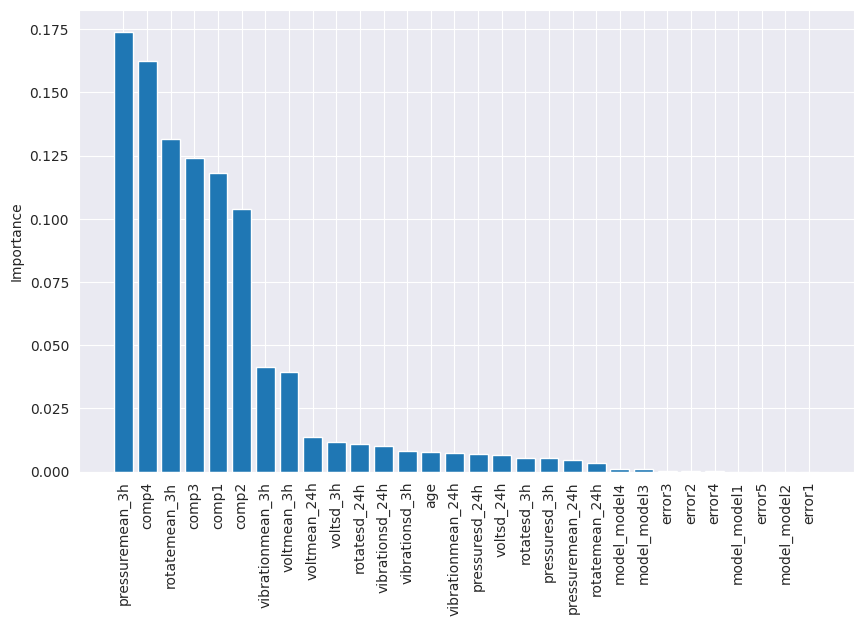

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=True, key=lambda x: x[1]))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

# ***Evaluation***
In predictive maintenance, machine failures are usually rare occurrences in the lifetime of the assets compared to normal operation. This causes an imbalance in the label distribution which usually causes poor performance as algorithms tend to classify majority class examples better at the expense of minority class examples as the total misclassification error is much improved when majority class is labeled correctly. This causes low recall rates although accuracy can be high and becomes a larger problem when the cost of false alarms to the business is very high. To help with this problem, sampling techniques such as oversampling of the minority examples are usually used along with more sophisticated techniques which are not covered in this notebook.

Text(0, 0.5, 'Count')

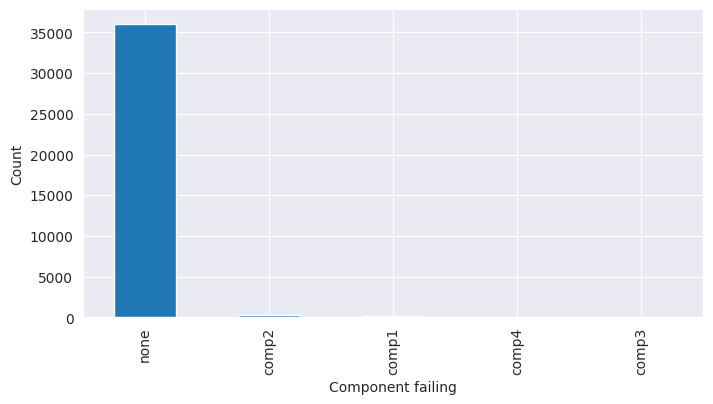

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
labeled_features['failure'].value_counts().plot(kind='bar')
plt.xlabel('Component failing')
plt.ylabel('Count')

Also, due to the class imbalance problem, it is important to look at evaluation metrics other than accuracy alone and compare those metrics to the baseline metrics which are computed when random chance is used to make predictions rather than a machine learning model. The comparison will bring out the value and benefits of using a machine learning model better.

In the following, we use an evaluation function that computes many important evaluation metrics along with baseline metrics for classification problems. For a detailed explanation of the metrics, please refer to the scikit-learn documentation and a companion blog post (with examples in R, not Python),



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []

    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)

    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])

    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(['macro precision', 'macro recall', 'macro F1'])

    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)

    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(['average accuracy',
                          'micro-averaged precision/recall/F1'])

    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(['majority class accuracy', 'majority class recall',
                          'majority class precision', 'majority class F1'])

    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(['expected accuracy', 'kappa'])


    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(['random guess accuracy', 'random guess precision',
                          'random guess recall', 'random guess F1'])

    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(['random weighted guess accuracy',
                          'random weighted guess precision',
                          'random weighted guess recall',
                          'random weighted guess F1'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels

    return output_df

In [ ]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[14470    13    17     4     8]
 [   36    13     7     0     0]
 [   28     0    60     0     0]
 [   14     0     0     2     0]
 [   28     0     0     0    12]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[11534    12    11     1     2]
 [   15    26     7     0     0]
 [   28     1    51     0     0]
 [   15     0     0     1     0]
 [   22     0     0     0    10]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[8699    8    7    2    4]
 [  11   12    1    0    0]
 [  23    1   56    0    0]
 [  16    0    0    0    0]
 [  11    0    0    0    5]]


<ipython-input-67-f06044c26761>:16: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2 * precision * recall / (precision + recall)


,none,comp1,comp2,comp3,comp4
accuracy,0.989464,0.989464,0.989464,0.989464,0.989464
precision,0.992728,0.500000,0.714286,0.333333,0.600000
recall,0.997106,0.232143,0.681818,0.125000,0.300000
F1,0.994912,0.317073,0.697674,0.181818,0.400000
macro precision,0.628069,0.628069,0.628069,0.628069,0.628069
macro recall,0.467213,0.467213,0.467213,0.467213,0.467213
macro F1,0.518296,0.518296,0.518296,0.518296,0.518296
average accuracy,0.995786,0.995786,0.995786,0.995786,0.995786
micro-averaged precision/recall/F1,0.989464,0.989464,0.989464,0.989464,0.989464
majority class accuracy,0.986406,0.000000,0.000000,0.000000,0.000000
